# AIRS review

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI.semseg.utils import visualize
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2379.1-2023-06-aws-batch-a, built on 15 October 2023, 19:21:05


In [2]:
cache_object_name = cache.read("roofAI_ingest_AIRS_cache")
assert cache_object_name
logger.info(f"using cache: {cache_object_name}")

subset = "test"
index = 10

using cache: roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195


In [3]:
cache_object_path = objects.object_path(cache_object_name)

In [4]:
! ls {cache_object_path}

roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195
test
train
train.txt
val
val.txt


In [5]:
record_id = file.name(file.list_of(os.path.join(cache_object_path,subset,"image/*.tif"))[index])
logger.info(f"record_id: {record_id}")

record_id: christchurch_585


In [6]:
success, image = file.load_image(os.path.join(cache_object_path,f"{subset}/image/{record_id}.tif"))
assert success

In [7]:
success, mask = file.load_image(os.path.join(cache_object_path,f"{subset}/label/{record_id}.tif"))
assert success

unique_value = np.unique(mask)
logger.info(f"{len(unique_value)} unique value(s): {unique_value}")


2 unique value(s): [0 1]


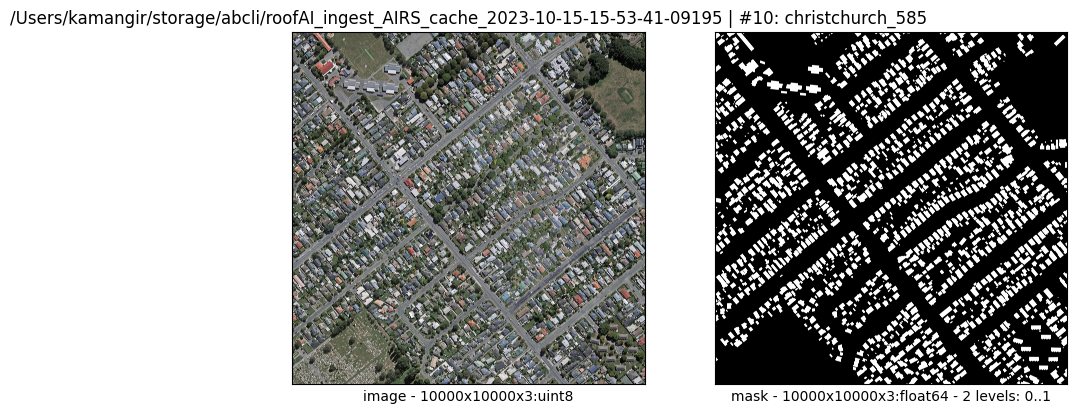

In [8]:
visualize(
    {
        "image": image,
        "mask": mask/np.max(mask),
    },
    in_notebook = True,
    description = [cache_object_path, f"#{index}: {record_id}"])

In [9]:
seed.log(cache_object_path)

abcli select /Users/kamangir/storage/abcli/roofAI_ingest_AIRS_cache_2023-10-15-15-53-41-09195; open .


In [10]:
# END